In [1]:
##### Using labels and defining domains
import openpnm as op
import numpy as np
op.visualization.set_mpl_style()

## Predefined Labels
pn = op.network.Cubic(shape=[5, 5, 1])
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17c36ff1f70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               5
  3  pore.xmax                                                               5
  4  pore.ymin                                                               5
  5 

In [2]:
# labels are booleans
print(pn['pore.left'])

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False]


In [3]:
# you can find pores that contain a label
np.where(pn['pore.left'])[0]

array([0, 1, 2, 3, 4], dtype=int64)

In [4]:
# you can use boolean logic to find pores
corner_pores = pn['pore.left']*pn['pore.front']
print(np.where(corner_pores)[0])

[0]


In [6]:
# pores and throats have their own methods to find elements with a label
pn.pores('left')

array([0, 1, 2, 3, 4])

In [8]:
# modes for query
# or - either (default)
pn.pores(['left', 'back'])

array([ 0,  1,  2,  3,  4,  9, 14, 19, 24])

In [9]:
# and - both
pn.pores(['left', 'back'], mode='and')

array([4])

In [10]:
# nor - neither
# xor - exclusive or
# nand - all but one
# xnor - more than one

In [11]:
## Custom labels
Ps = pn.pores(['left', 'back'], mode='and')

# Method 1 - Boolean masks

# create a variable
Ps = pn.pores(['left', 'back'], mode='and')

# create an empty label array
pn['pore.corner'] = False
print(pn['pore.corner'])

# insert true where you want it
pn['pore.corner'][Ps] = True
print(pn.pores('corner'))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[4]


In [12]:
# Method 2 - Set label
Ps = Ps = pn.pores(['left', 'front'], mode='and')
pn.set_label(label='corner', pores=Ps)
print(pn.pores('corner'))

pn.set_label(label='pore.corner', mode='purge')
print('pore.corner' in pn.keys())

[0 4]
False


In [13]:
## Reading and writing data using @
# you can target data to read and write using @
pn['pore.coords@left']

array([[0.5, 0.5, 0.5],
       [0.5, 1.5, 0.5],
       [0.5, 2.5, 0.5],
       [0.5, 3.5, 0.5],
       [0.5, 4.5, 0.5]])

In [14]:
pn['pore.values'] = 1.0
pn['pore.values@left'] = 2.0
print(pn['pore.values'])

[2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [15]:
pn['pore.values@right'] = [4, 5, 6, 7, 8]
print(pn['pore.values'])

[2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 5. 6. 7.
 8.]


In [16]:
pn['pore.new_array@left'] = 2.0
print(pn['pore.new_array'])

[ 2.  2.  2.  2.  2. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]


In [17]:
pn['pore.new_array@front'] = 3.0
print(pn['pore.new_array'])

[ 3.  2.  2.  2.  2.  3. nan nan nan nan  3. nan nan nan nan  3. nan nan
 nan nan  3. nan nan nan nan]


In [18]:
print(pn['pore.new_array@left'])

[3. 2. 2. 2. 2.]


In [19]:
## Major conceptual shift - no more Geometry and Physics onject - you can now add models to Network and Phase objects directly
pn.add_model(propname='pore.seed', 
             model=op.models.geometry.pore_seed.random,
             domain='left',
             seed=0,
             num_range=[0.1, 0.5])

In [20]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17c36ff1f70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
  4  pore.values                                                       25 / 25
  5  pore.new_array                                                     9 / 25
  6  pore.seed                                                          5 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2 

In [21]:
pn.add_model(propname='pore.seed', 
             model=op.models.geometry.pore_seed.random,
             domain='right',
             seed=0,
             num_range=[0.5, 0.9])

In [22]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17c36ff1f70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
  4  pore.values                                                       25 / 25
  5  pore.new_array                                                     9 / 25
  6  pore.seed                                                         10 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2 

In [23]:
print(pn.models)

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#   Property Name                       Parameter                 Value
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1   pore.coordination_number@all        model:                    coordination_number
                                        regeneration mode:        deferred
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
2   throat.spacing@all                  model:                    pore_to_pore_distance
                                        regeneration mode:        deferred
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
3   pore.seed@left                      model:                    random
                                        seed:                     0
                                        num_range:                [0.1, 0.5]
                                        re

In [24]:
## Defining and chaning subdomain location
pn.pores('left')

array([0, 1, 2, 3, 4])

In [25]:
pn['pore.left'][[4, 5]] = True
del pn['pore.seed']
pn.run_model('pore.seed@left')
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17c36ff1f70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
  4  pore.values                                                       25 / 25
  5  pore.new_array                                                     9 / 25
  6  pore.seed                                                          6 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2 

In [26]:
## Mixing full domain and subdomain models
del pn.models['pore.seed@left']
del pn.models['pore.seed@right']
pn.add_model(propname='pore.seed', 
             model=op.models.geometry.pore_seed.random)
pn.add_model(propname='pore.diameter', 
             model=op.models.geometry.pore_size.normal,
             domain='left',
             scale=0.1, 
             loc=1,
             seeds='pore.seed')
pn.add_model(propname='pore.diameter', 
             model=op.models.geometry.pore_size.normal,
             domain='right',
             scale=2, 
             loc=10,
             seeds='pore.seed')


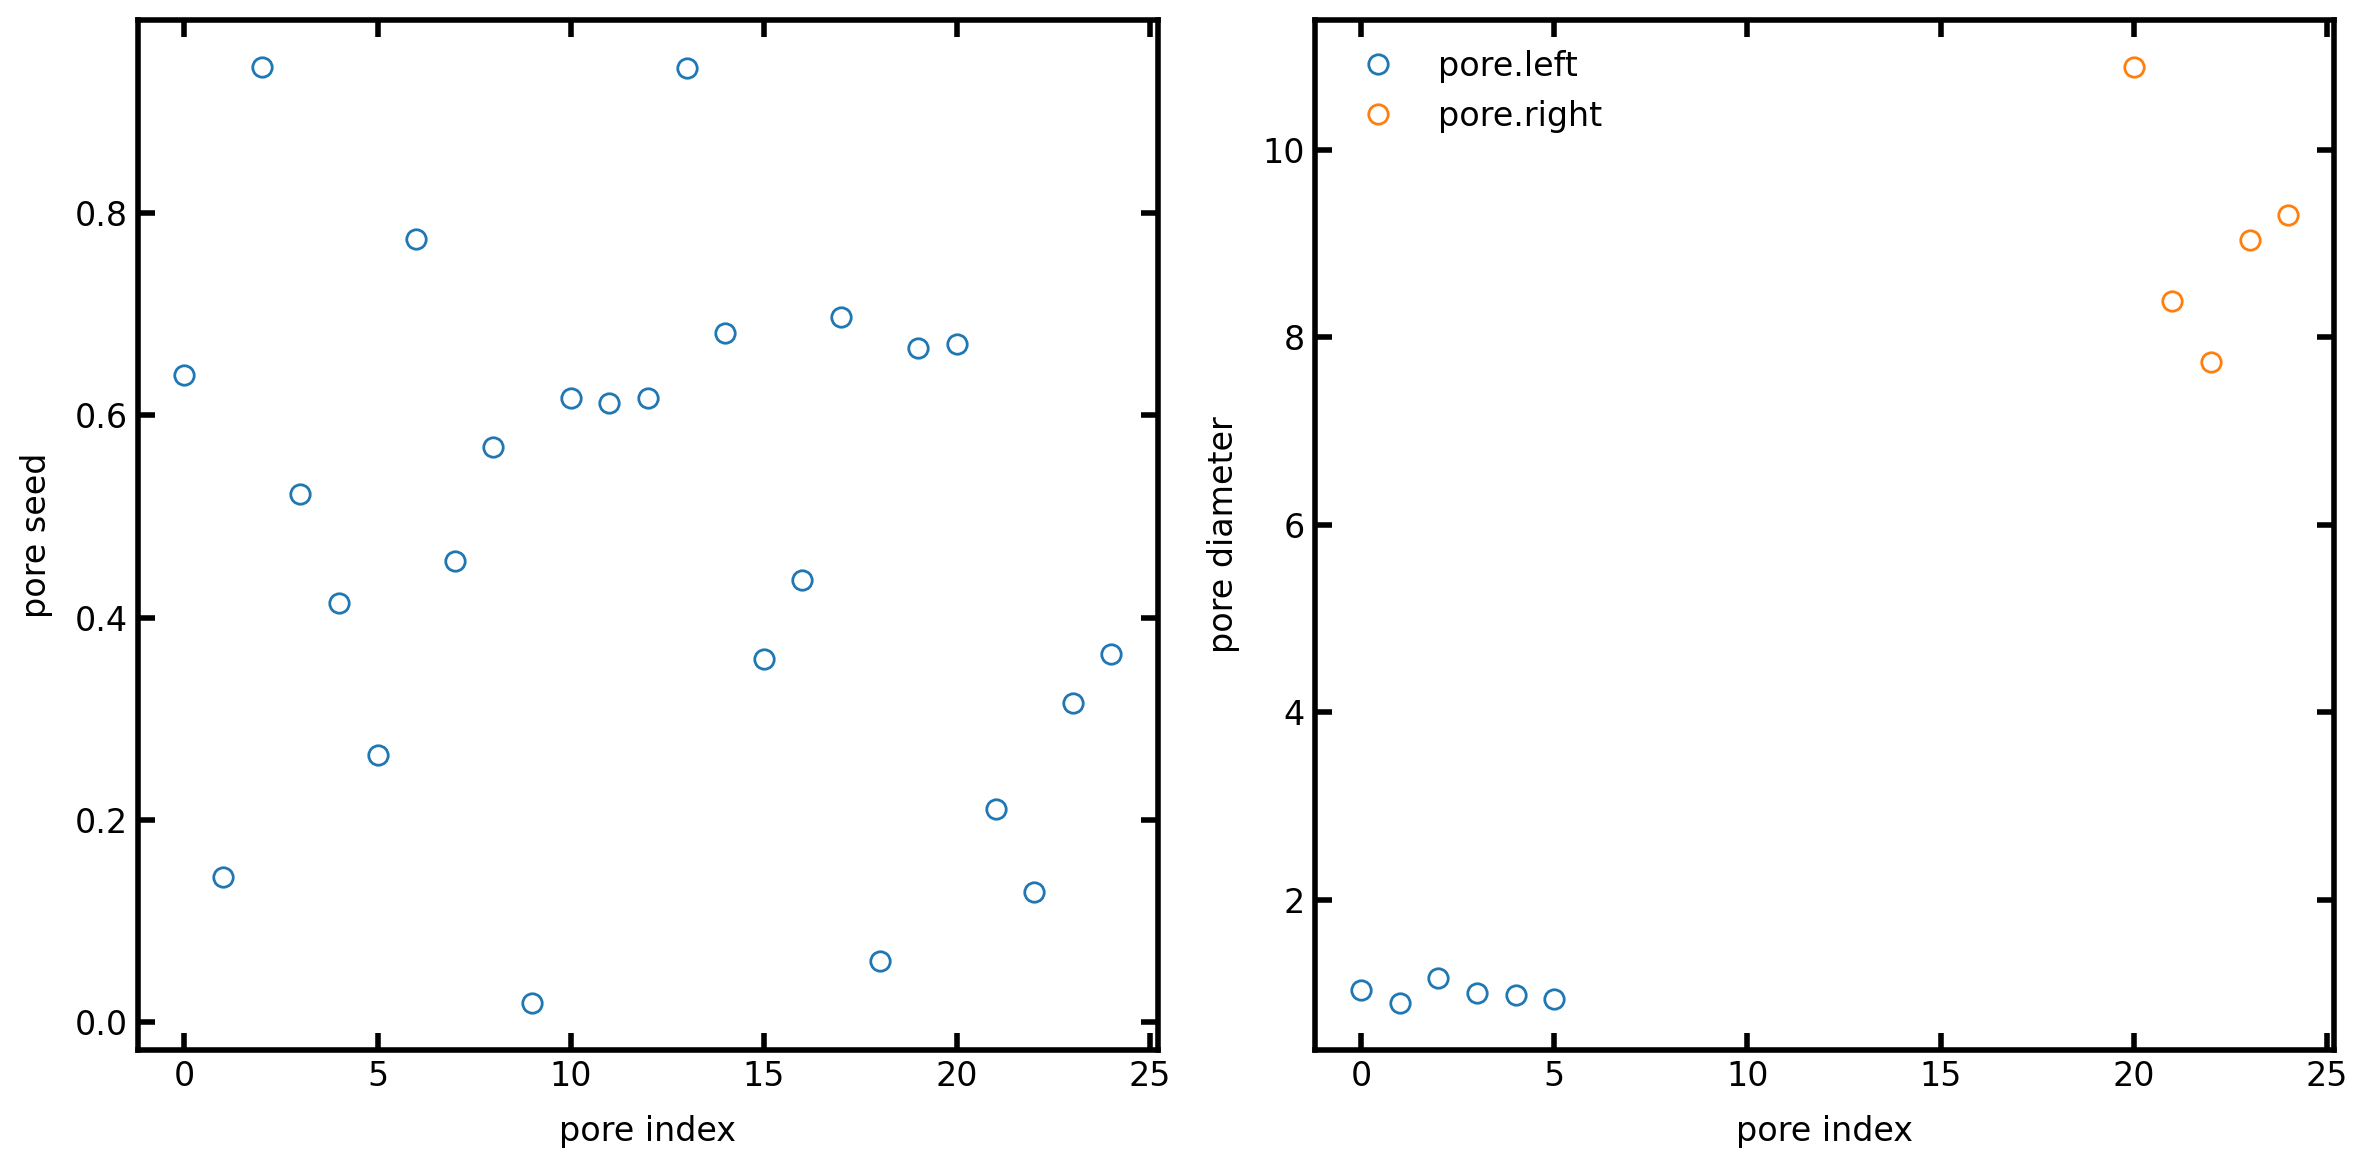

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

ax[0].plot(pn.Ps, pn['pore.seed'], 'o')
ax[0].set_ylabel('pore seed')
ax[0].set_xlabel('pore index')

ax[1].plot(pn.pores('left'), pn['pore.diameter@left'], 'o', label='pore.left')
ax[1].plot(pn.pores('right'), pn['pore.diameter@right'], 'o', label='pore.right')
ax[1].set_ylabel('pore diameter')
ax[1].set_xlabel('pore index')
ax[1].legend();

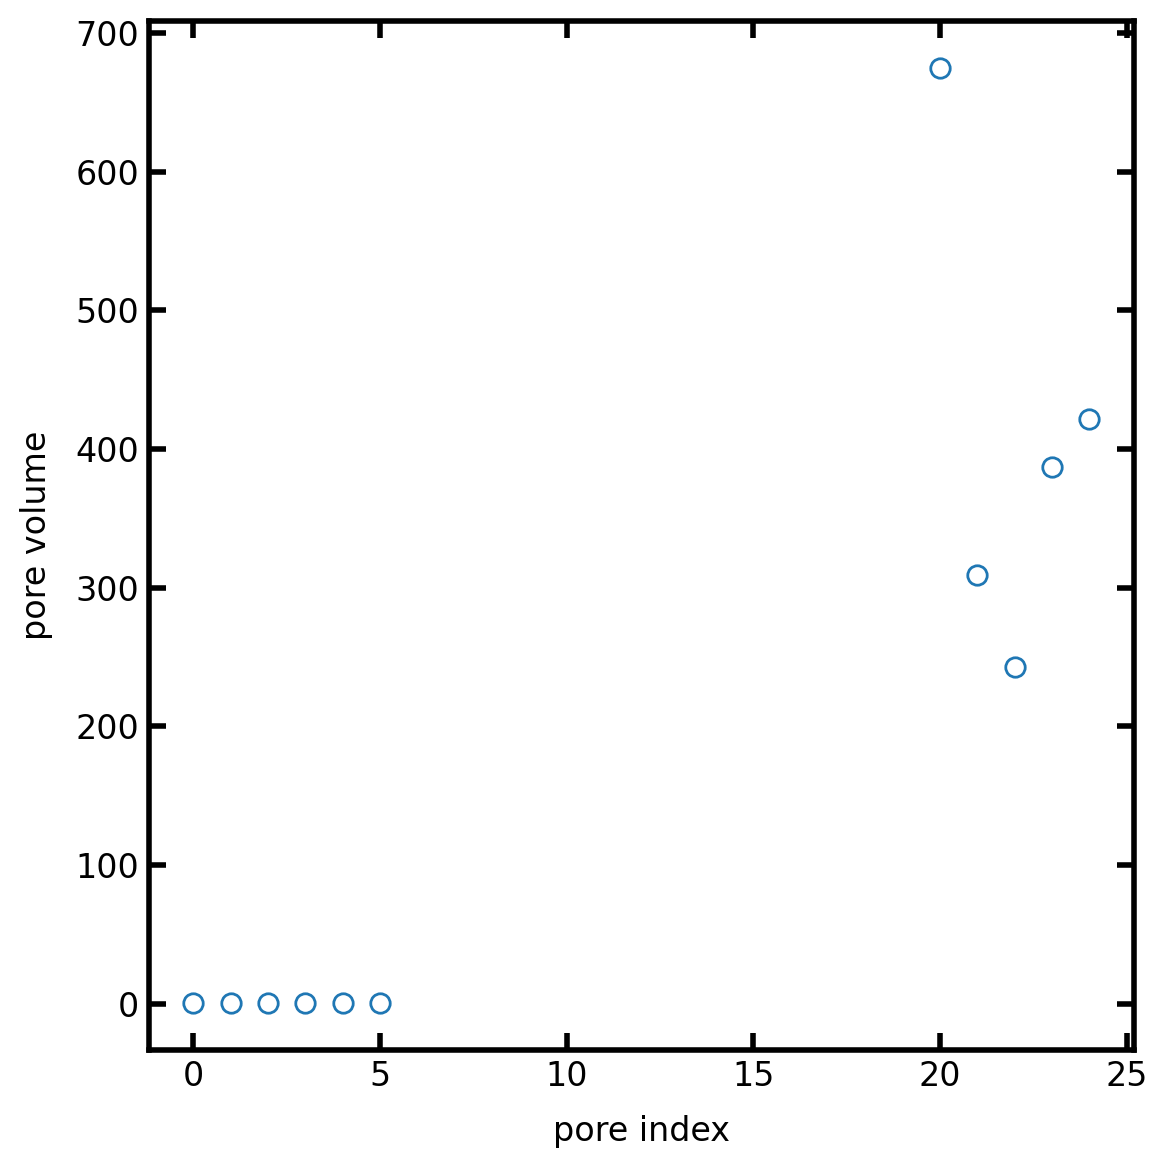

In [28]:
pn.add_model(propname='pore.volume', 
             model=op.models.geometry.pore_volume.sphere)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[6, 6])

ax.plot(pn.Ps, pn['pore.volume'], 'o')
ax.set_ylabel('pore volume')
ax.set_xlabel('pore index');

In [29]:
## Mixing many subdomains of different shape
Ps = pn.pores(['front', 'back'])
Ts = pn.find_neighbor_throats(Ps, asmask=True)
pn['throat.front'] = Ts
pn['throat.back'] = ~Ts
pn.add_model(propname='throat.diameter', 
             model=op.models.geometry.throat_size.from_neighbor_pores,
             domain='front', 
             mode='min')
pn.add_model(propname='throat.diameter', 
             model=op.models.geometry.throat_size.from_neighbor_pores,
             domain='back',
             mode='max')


In [30]:
print(pn)



══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17c36ff1f70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
  4  pore.values                                                       25 / 25
  5  pore.new_array                                                     9 / 25
  6  pore.seed                                                         25 / 25
  7  pore.diameter                                                     11 / 25
  8  pore.volume                                                       11 / 25
  9  throat.diameter                                                   40 / 40
――――